In [1]:
#import libs
import time
import cv2                                   


from matplotlib import pyplot as plt  
from pynq import Overlay
import pynq.lib.dma
from pynq import Xlnk
import numpy as np
from pynq import MMIO
import random
from pynq import allocate
import numpy as np
import socket, time

In [2]:
#open camera
frame_in_w = 1280
frame_in_h = 720

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w)#set picture width
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h)#set hight
cap.open(0)

True

In [3]:
#define data containers
pic_in_arr = allocate(shape=(600,800,3),dtype=np.uint8)
bg_in_arr = allocate(shape=(600,800,3),dtype=np.uint8)
mask_in_arr = allocate(shape=(600,800,3),dtype=np.uint8)
out_arr = allocate(shape=(600,800,3),dtype=np.uint8)
np_out = np.zeros((600,800,3), dtype=np.uint8)

In [4]:
#import ips
overlay = Overlay("./design_1.bit")
ip = overlay.top_0
#dma0 = overlay.axi_dma_0
#dma1 = overlay.axi_dma_1
#dma2 = overlay.axi_dma_2

pic_dma = overlay.axi_dma_1
mask_dma = overlay.axi_dma_0
back_dma = overlay.axi_dma_2

In [5]:
#get background picture
bg_img = cv2.imread("background.jpg")


In [6]:
mask_img = cv2.imread("mask.jpg")

In [19]:
num = 0

In [ ]:
#for i in range (1,10):
while True:
    for i in range (1,3):
        ret, np_frame = cap.read()
#     print(send_image(np_frame, dest_ip))
#     print(send_image(np_frame))
#     print(recv_image(example_save_path))
        np_frame = cv2.resize(np_frame,(800,600))
        send_image(np_frame)
        recv_image(example_save_path)
        mask_img = cv2.imread("test_result.jpg")
        np.copyto(pic_in_arr,np_frame)
        np.copyto(bg_in_arr,bg_img)
        np.copyto(mask_in_arr,mask_img)
    #dma
        pic_dma.sendchannel.transfer(pic_in_arr)
        mask_dma.sendchannel.transfer(mask_in_arr)
        back_dma.sendchannel.transfer(bg_in_arr)
        mask_dma.recvchannel.transfer(out_arr)
        ip.write(0x00, 0x1)
        isready = ip.read(0x00)
        while (isready == 1):
            isready = ip.read(0x00)
        pic_dma.sendchannel.wait()
        mask_dma.sendchannel.wait()
        back_dma.sendchannel.wait()
        mask_dma.recvchannel.wait()
        np.copyto(np_out,out_arr)
    
    #convert to PIL format
    #pil_img = Image.fromarray(cv2.cvtColor(np_out,cv2.COLOR_BGR2RGB))
    #p_data = np.asarray(pil_img)
    
    #buf[:,:,0:3]=np.concatenate((np_out[:,:,0],np_out[:,:,1],np_out[:,:,2]))
        buf[:,:,0]=np_out[:,:,1]
        buf[:,:,1]=np_out[:,:,0]
        buf[:,:,2]=np_out[:,:,2]
        buf[:,:,3]=0xff

    ret, np_frame = cap.read()
    a = brightness1(np_frame)
    if(a < 110):
        num = (num + 1) % 4
        if(num == 0):
            bg_img = cv2.imread("background.jpg")
        if(num == 1):
            bg_img = cv2.imread("background2.jpg")
        if(num == 2):
            bg_img = cv2.imread("background3.jpg")
        if(num == 3):
            bg_img = cv2.imread("background4.jpg")
        
    
    

In [6]:
from pynq import Overlay,allocate
import pynq.lib.video
from pynq.lib.video.common import PixelFormat,VideoMode

framemode = VideoMode(800,600,32)
vdma=overlay.axi_vdma_0
vdma.writechannel.mode=framemode
vdma.writechannel.start()
vdma.writechannel.parked

#buf=np.zeros((800,600,3),dtype=np.int8)
buf=vdma.writechannel.newframe()
#buf=np.zeros((600,800,3),dtype=np.int32)

#buf[:,:,:]=np.zeros((600,800,4),dtype=np.uint8)


vdma.writechannel.setframe(buf)
tpg = overlay.v_tpg_0
tpg.write(0x10,600)
tpg.write(0x18,800)
tpg.write(0x40,0)
tpg.write(0x20,0x9)
tpg.write(0x0,0x81)

bin(tpg.read(0x0))
tpg.read(0x4)
tpg.read(0xc)




0

In [7]:
mix = overlay.v_mix_0
mix.write(0x4,0)
mix.write(0x10,800)
mix.write(0x18,600)




In [8]:
mix.write(0x100,0)
mix.write(0x108,0)
mix.write(0x110,0)
mix.write(0x118,800)
mix.write(0x120,48)
mix.write(0x128,600)
mix.write(0x130,0)

mix.write(0x200,255)
mix.write(0x208,0)
mix.write(0x210,0) 
mix.write(0x218,800)
mix.write(0x220,48)
mix.write(0x228,600)
mix.write(0x230,0)

In [9]:
mix.write(0x40,0b11)
mix.write(0x0,0x81)

In [7]:
buf[0:20,0:20,:]=[0,0,0,0xff]

In [ ]:
c = overlay

In [ ]:
ret, np_frame = cap.read()

In [ ]:
np_frame.size

In [ ]:
type(np_frame)

In [ ]:
np_frame.shape

In [ ]:
ret, np_frame = cap.read()
np_frame.shape

In [10]:
# def send_image(image, target_ip):
#     data = cv2.imencode('.jpg', image)[1].tobytes()
#     len_data = len(data)
#     space = (len_data + 9999) // 10000
#     UDP_server.sendto(space.to_bytes(4, 'big'), target_ip)
#     for i in range(0, space):
#         start_idx = i * 10000
#         end_idx = min(len_data, (i+1) * 10000)
#         UDP_server.sendto(data[start_idx: end_idx], target_ip)
#     return 'Send Image OK'

def send_image(image):
    data = cv2.imencode('.jpg', image)[1].tobytes()
    len_data = len(data)
    space = len_data
    UDP_server.sendall(space.to_bytes(16, 'big'))
    UDP_server.sendall(data)
    return 'Send Image  OK'

# def recv_image(image_path):
#     space, addr = UDP_server.recvfrom(10000)
#     space = int.from_bytes(space, 'big')
#     with open(image_path, 'wb') as f:
#         for i in range(space):
#             data, addr_now = UDP_server.recvfrom(10000)
#             assert addr == addr_now
#             f.write(data)
#     return 'recv Image OK'
def recv_image(image_path):
    space = UDP_server.recv(16)
    space = int.from_bytes(space, 'big')
    #print('space {}'.format(space))
    with open(image_path, 'wb') as f:
        while space > 0:
            data = UDP_server.recv(1024)
            #print('data len {}'.format(len(data)))
            space -= len(data)
            f.write(data)
    return 'Recv Image {} OK'.format(image_path)

In [23]:
dest_ip = ('192.168.31.56', 13579)
UDP_server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
UDP_server.connect(dest_ip)
example_image_path = './test.jpg'
# example_save_path = './test_result.jpg'
example_save_path = './test_result.jpg'

-1.0

In [13]:
import numpy as np
import copy
import random
import math
from PIL import Image  
from PIL import ImageStat

In [14]:
def brightness1( in_pic ):
    p_img = Image.fromarray(cv2.cvtColor(in_pic,cv2.COLOR_BGR2RGB))
    im = p_img.convert('L')   
    stat = ImageStat.Stat(im)   
    return stat.mean[0]



In [17]:
ret, np_frame = cap.read()
np_frame = cv2.resize(np_frame,(800,600))

In [18]:
a = brightness1(np_frame)

In [19]:
a

114.32385

In [16]:
while True:
    time1 = time.time()
    ret, np_frame = cap.read()
    np_frame = cv2.resize(np_frame,(800,600))
    a = brightness1(np_frame)
    time2 = time.time()
    print(a)

112.72788958333334
110.86021041666666
103.21399583333333
99.46996041666667
115.86536666666667
156.89361458333335
208.79669166666667
237.64398125
220.07959375
220.67086875
214.64135833333333
207.32082083333333
203.43476666666666
181.56767708333334
119.5724
105.5910625
124.01732708333333
127.51428958333334
117.86539583333334
94.80372708333333
16.283604166666667
34.11997916666667
208.02923333333334
236.952175
215.8358125
170.72551458333334
166.62151041666667
170.29703333333333
203.41931875
208.99884166666666
203.43875833333334
194.69137916666668
182.34863125
161.40652916666667
128.99356458333332
96.06600416666667
85.9868875
104.4645875
134.56859583333335
127.85915208333333
175.03899375
189.5986375
179.85005833333332
160.23937083333334
149.58459583333334
137.40026666666665
131.823125
129.87161875
136.20664583333334
136.13280625
135.33039791666667
132.49258541666666
142.43096666666668
145.32069791666666
142.28274166666668
140.795275
138.3118375
138.06758541666667
129.11773125
104.9076270833

KeyboardInterrupt: 

In [27]:
cv2.imshow(np_frame)

TypeError: Required argument 'mat' (pos 2) not found

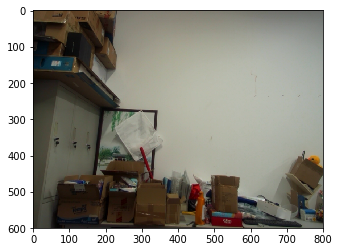

In [28]:
from matplotlib import pyplot as plt  
plt.imshow(np_frame[:,:,[2,1,0]])

In [17]:
num = 0